In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df1 = pd.read_excel('flexural strength.xlsx', sheet_name=0)

In [3]:
print(df1.columns)
print(df1.shape)

Index(['Specimen no  ', ' Layer thickness (mm)', 'Feed rate (mm/ s)',
       'Raster orientation', 'Peak Load', 'Flexural Strength (MPa)'],
      dtype='object')
(54, 6)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df1.loc[:,[' Layer thickness (mm)', 'Feed rate (mm/ s)', 'Raster orientation']], \
df1.loc[:, 'Flexural Strength (MPa)'], train_size = 27, shuffle = True)

In [5]:
# from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
# model = GradientBoostingRegressor(random_state=0)
# model = RandomForestRegressor()
model = xgb.XGBRegressor(n_estimators=300, booster='gbtree', learning_rate=0.3, max_depth=6)
model_name = 'XGBRegressor.png'

In [6]:
model.fit(X_train.to_numpy(), y_train.to_numpy())
predictions1 = predictions = model.predict(X_test.to_numpy())
print(type(predictions))
print(predictions.shape)
predictions = np.concatenate((model.predict(X_train), predictions), axis=0)
print(predictions.shape)
#predictions = model.predict(df1.loc[:, ['Extrusion Temperature (in C)', 'Layer Height (mm)', 'Shell Thickness (mm)']].to_numpy())

<class 'numpy.ndarray'>
(27,)
(54,)


In [7]:
print(predictions)

[101.51689   88.73968  122.3158    72.75164   84.741005 112.73432
 129.50883   87.9393    97.53683  100.73234  109.52799   91.93651
  91.13622   89.535934  83.14431  114.29943   78.34529  127.912834
 107.912704  77.54787   73.54853  119.130875 102.35066  123.11437
 109.51915   87.13957   81.54374   73.47606  123.04185   84.97188
 112.87988  122.371315 118.05804  105.77518   91.00814  123.10787
  77.96332  109.536644  81.53377   73.87097   90.52365  118.20893
 122.29879   73.14692  106.56854   98.74439   83.01326   73.32153
  81.63162   90.65467   84.764595 127.98536   91.942154  97.703804]


In [8]:
X_train['Type'] = 'Train'
X_test['Type'] = 'Test'
newResult = pd.concat([X_train, X_test])
newResult = newResult.reset_index(drop=True)
newResult['Predictions'] = pd.Series(predictions)
# newResult
result = df1.merge(newResult, how='left', on=[' Layer thickness (mm)', 'Feed rate (mm/ s)', 'Raster orientation'])


In [9]:
# # result = df1.loc[:, ['f ', 'd', 'T', 'Stress']].reset_index(drop=True)
# result = df1
# # result = df1.loc[:, ['Dataset Type', 'Expt', 'XGBR']].reset_index(drop=True)
# result['Predictions'] = pd.Series(predictions)

r2 score (amt) :  0.9797753136733457
MAE (amt) :  6.427281640880995


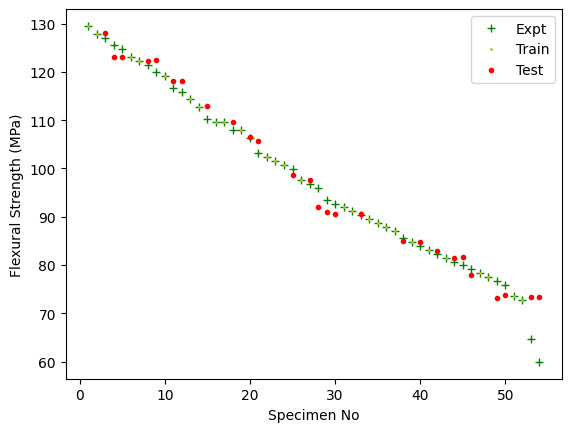

In [10]:
# print("r2 score (author) : ", r2_score(result['Stress'].to_numpy(), result['XGBR'].to_numpy()))
print("r2 score (amt) : ", r2_score(result['Flexural Strength (MPa)'].to_numpy(), result['Predictions'].to_numpy()))
print("MAE (amt) : ", mean_squared_error(result['Flexural Strength (MPa)'].to_numpy(), result['Predictions'].to_numpy()))
#print(pow(mean_squared_error(y_test.to_numpy(), predictions), 0.5))
plt.ylabel('Flexural Strength (MPa)')
plt.xlabel('Specimen No')
# plt.plot(result['Predictions'], 'r+')
plt.plot(result['Specimen no  '], result['Flexural Strength (MPa)'], 'g+', label='Expt')
plt.plot(result.loc[result['Type'] == 'Train' ,'Specimen no  '], \
         result.loc[result['Type'] == 'Train' ,'Predictions'], 'yo', label='Train', markersize=1)
plt.plot(result.loc[result['Type'] == 'Test' ,'Specimen no  '], \
         result.loc[result['Type'] == 'Test' ,'Predictions'], 'ro', label = 'Test', markersize=3)
plt.legend()
plt.savefig(model_name)

In [ ]:
result

,Specimen no,Layer thickness (mm),Feed rate (mm/ s),Raster orientation,Peak Load,Flexural Strength (MPa),Type,Predictions
0,1,0.05,20,0,162,129.510738,Train,129.508835
1,2,0.05,40,0,160,127.911840,Train,127.912834
2,3,0.05,60,0,159,127.112391,Test,127.985359
3,4,0.05,20,45,157,125.513493,Test,123.107872
4,5,0.05,40,45,156,124.714044,Test,123.041847
5,6,0.05,60,45,154,123.115146,Train,123.114372
6,7,0.05,20,90,153,122.315697,Train,122.315804
7,8,0.05,40,90,152,121.516248,Test,122.298790
8,9,0.05,60,90,150,119.917350,Test,122.371315
9,10,0.10,20,0,149,119.117901,Train,119.130875
